# **Japanese Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

japanese_dataset_path = '../../datasets/UCI/Japanese/crx.data'
japanese_prep_dataset_path = '../../datasets/preprocessed/japanese/'

(CVXPY) Mar 05 10:57:34 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 05 10:57:34 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(japanese_prep_dataset_path)

In [3]:
data = utilities.read_csv(japanese_dataset_path, header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#### Fix column names formatting.

In [5]:
data.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#### Handle special missing values.

In [8]:
utilities.replace_to_nan(data, "?")

#### Fix column dtypes.

In [9]:
data['A1'] = data['A1'].astype('category')
data['A2'] = data['A2'].astype('float64')
data['A3'] = data['A3'].astype('float64')
data['A4'] = data['A4'].astype('category')
data['A5'] = data['A5'].astype('category')
data['A6'] = data['A6'].astype('category')
data['A7'] = data['A7'].astype('category')
data['A8'] = data['A8'].astype('float64')
data['A9'] = data['A9'].astype('category')
data['A10'] = data['A10'].astype('category')
data['A11'] = data['A11'].astype('float64')
data['A12'] = data['A12'].astype('category')
data['A13'] = data['A13'].astype('category')
data['A14'] = data['A14'].astype('float64')
data['A15'] = data['A15'].astype('float64')
data['defaulted'] = data['A16'] == '+'

In [10]:
data.drop(['A16'], axis=1, inplace=True)

#### Plot features data types.

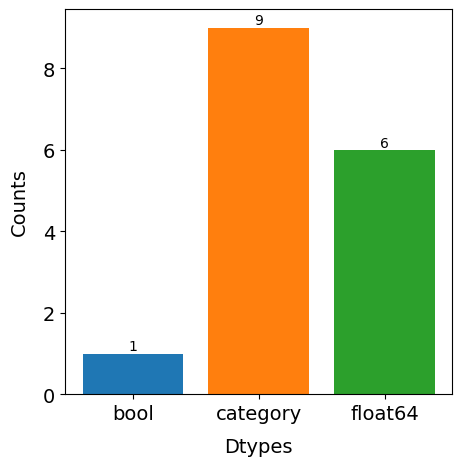

In [11]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=japanese_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [12]:
before_data_cleaning_count = len(data)

#### Plot class distribution.

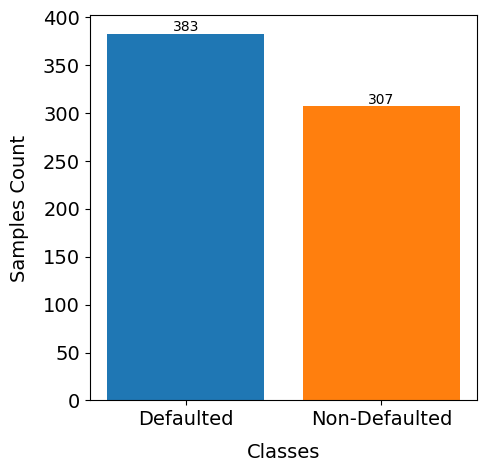

In [13]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=japanese_prep_dataset_path + 'class_distribution.pdf')

#### Plot missing values histogram.

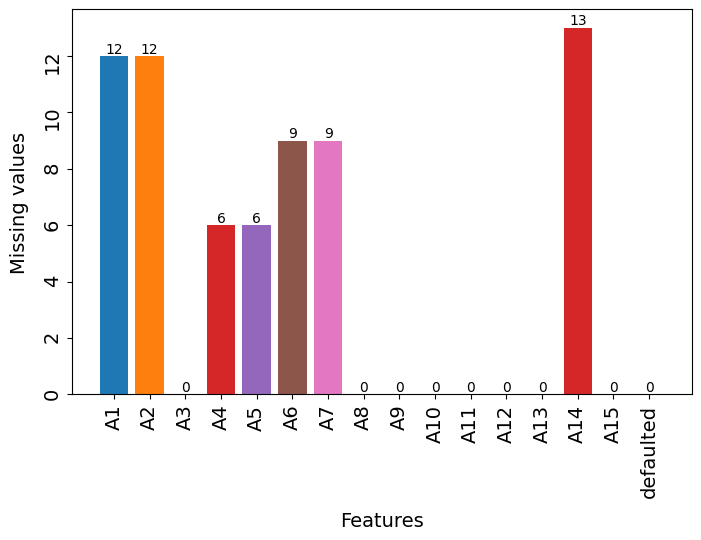

In [14]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,5),
                   rotated_ticks=True, save_path=japanese_prep_dataset_path + 'missing_values-1.pdf')

#### Apply optimal binninf and WoE.

In [15]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=japanese_prep_dataset_path,
                                                  verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  5.42it/s]


In [16]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,defaulted
0,0.019281,0.065997,-0.247919,-0.201993,-0.201993,-0.333665,0.096221,-0.533576,-1.526356,-1.109174,-0.331853,0.058701,-0.066059,0.488596,-0.022208,True
1,-0.087656,-0.905440,-0.452713,-0.201993,-0.201993,-0.859275,-0.783495,-0.733463,-1.526356,-1.109174,-2.610070,0.058701,-0.066059,-0.757116,-2.141055,True
2,-0.087656,0.065997,0.211613,-0.201993,-0.201993,-0.859275,-0.783495,-0.533576,-1.526356,0.887577,0.638761,0.058701,-0.066059,0.488596,-2.141055,True
3,0.019281,0.065997,0.342574,-0.201993,-0.201993,-0.333665,0.096221,-0.733463,-1.526356,-1.109174,-2.610070,-0.068995,-0.066059,-0.042032,2.391544,True
4,0.019281,0.065997,-0.452713,-0.201993,-0.201993,-0.333665,0.096221,-0.733463,-1.526356,0.887577,0.638761,0.058701,0.808432,0.355065,-0.022208,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.019281,0.065997,-0.680340,0.742835,0.742835,-0.333665,-0.783495,-0.533576,2.366904,0.887577,0.638761,0.058701,-0.066059,0.488596,-0.022208,False
686,-0.087656,0.065997,0.578760,-0.201993,-0.201993,-0.030834,0.096221,-0.733463,2.366904,-1.109174,-0.331853,-0.068995,-0.066059,0.562704,-0.737238,False
687,-0.087656,0.065997,-0.680340,0.742835,0.742835,1.661544,1.591192,-0.733463,2.366904,-1.109174,-0.331853,-0.068995,-0.066059,0.562704,2.391544,False
688,0.019281,0.971477,-0.247919,-0.201993,-0.201993,0.389722,0.096221,0.839589,2.366904,0.887577,0.638761,0.058701,-0.066059,0.488596,-2.141055,False


#### All missing values handled.

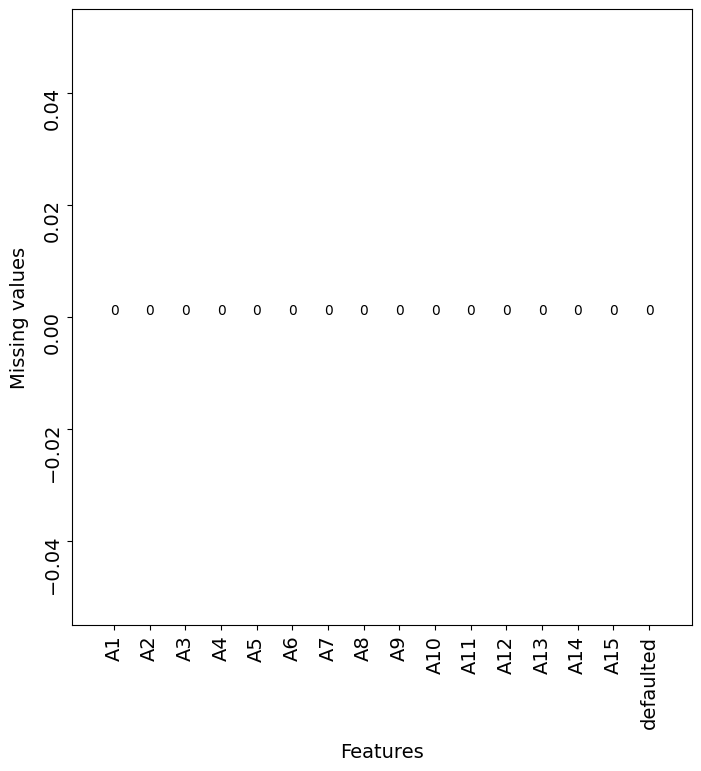

In [17]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=japanese_prep_dataset_path + 'missing_values-2.pdf')

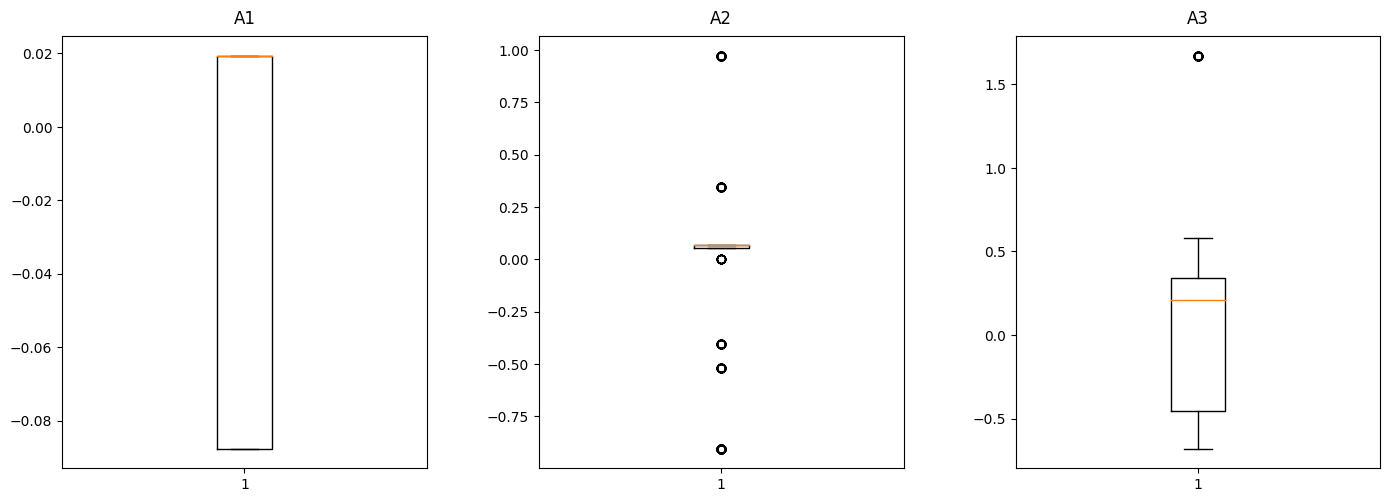

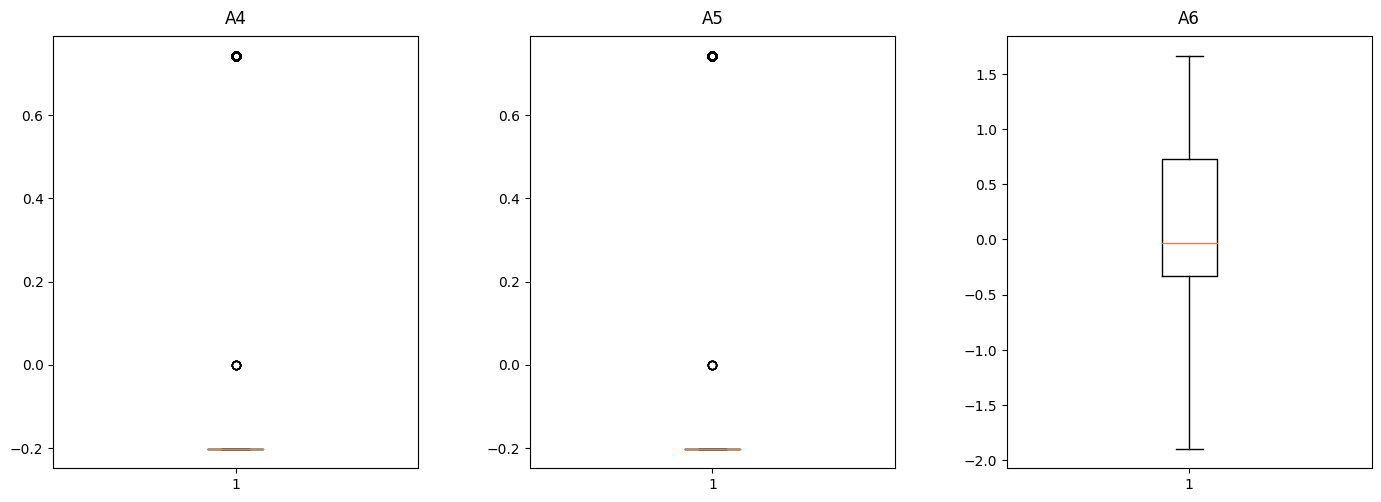

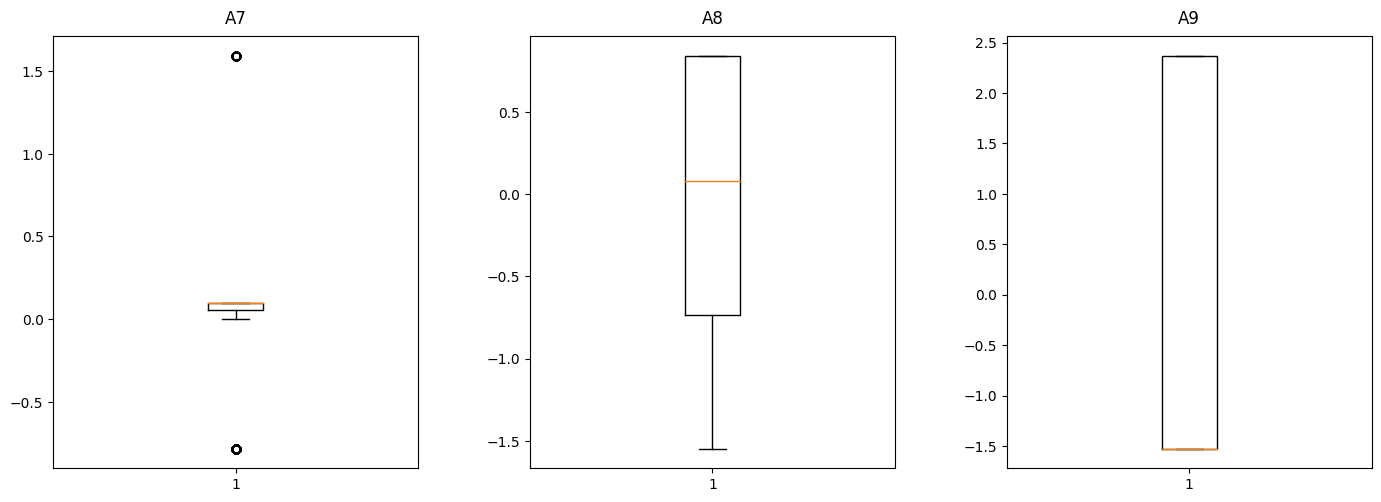

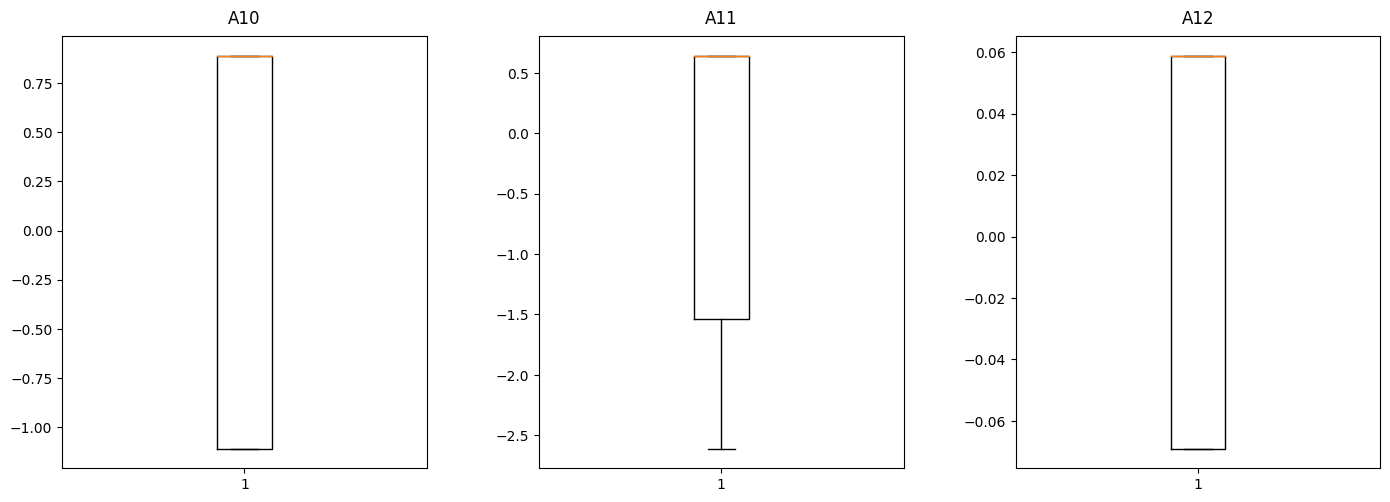

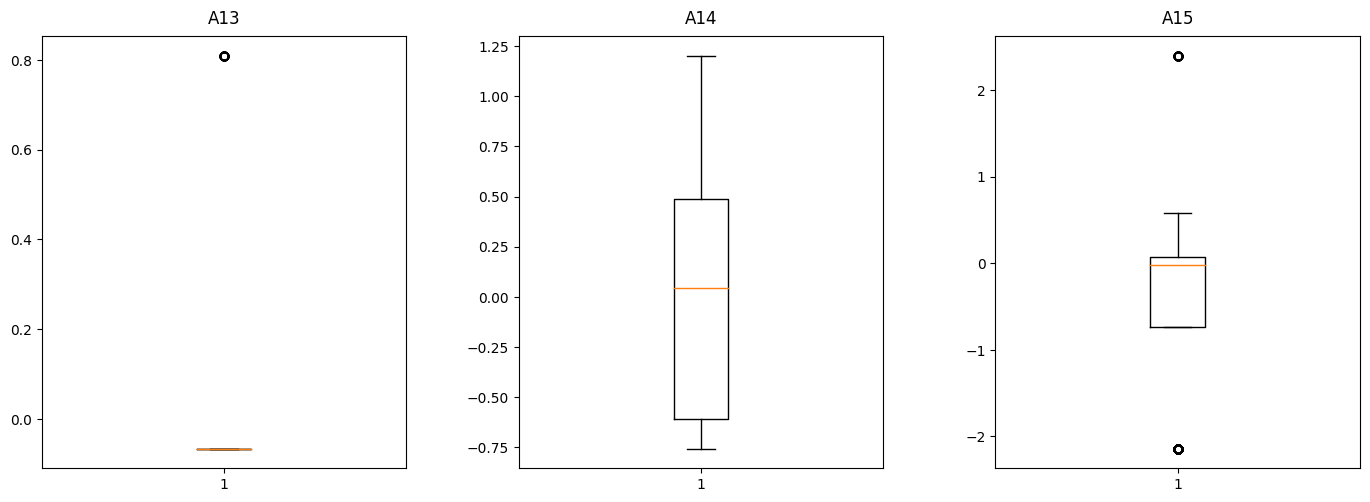

In [18]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=japanese_prep_dataset_path)

In [19]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=japanese_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

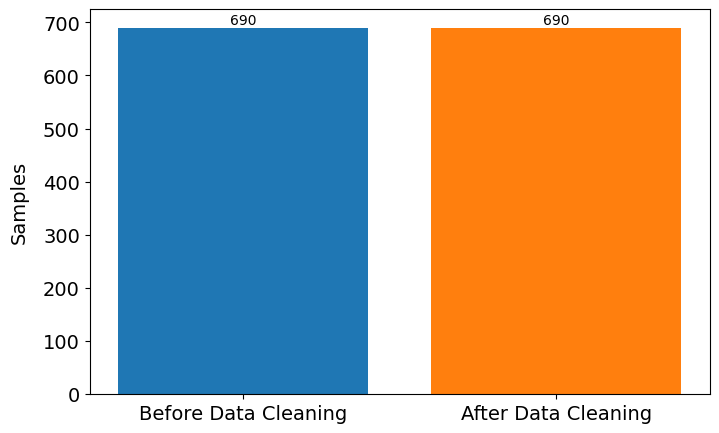

In [20]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=japanese_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

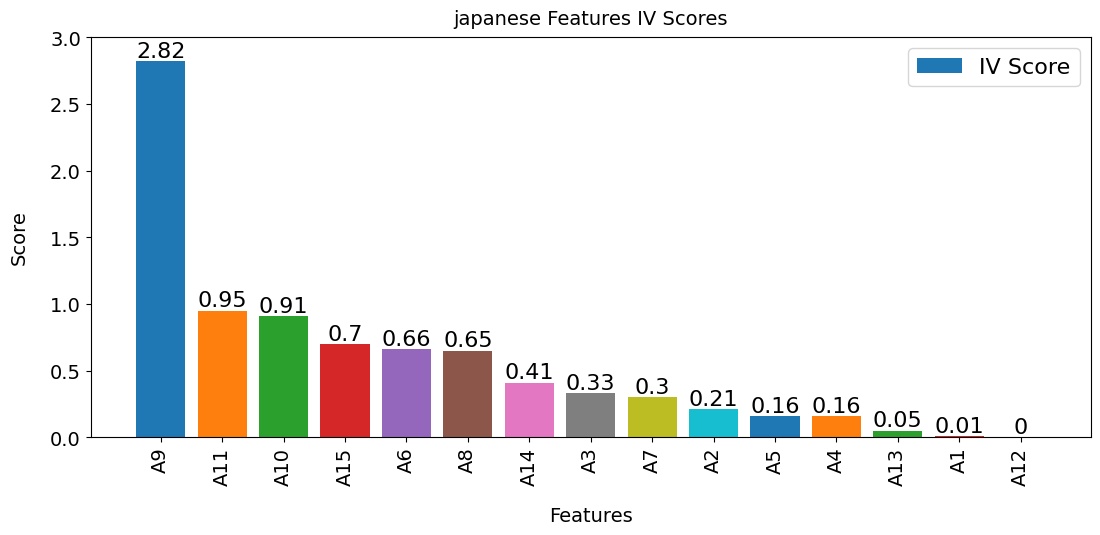

In [21]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'japanese Features IV Scores')

#### Features correlation

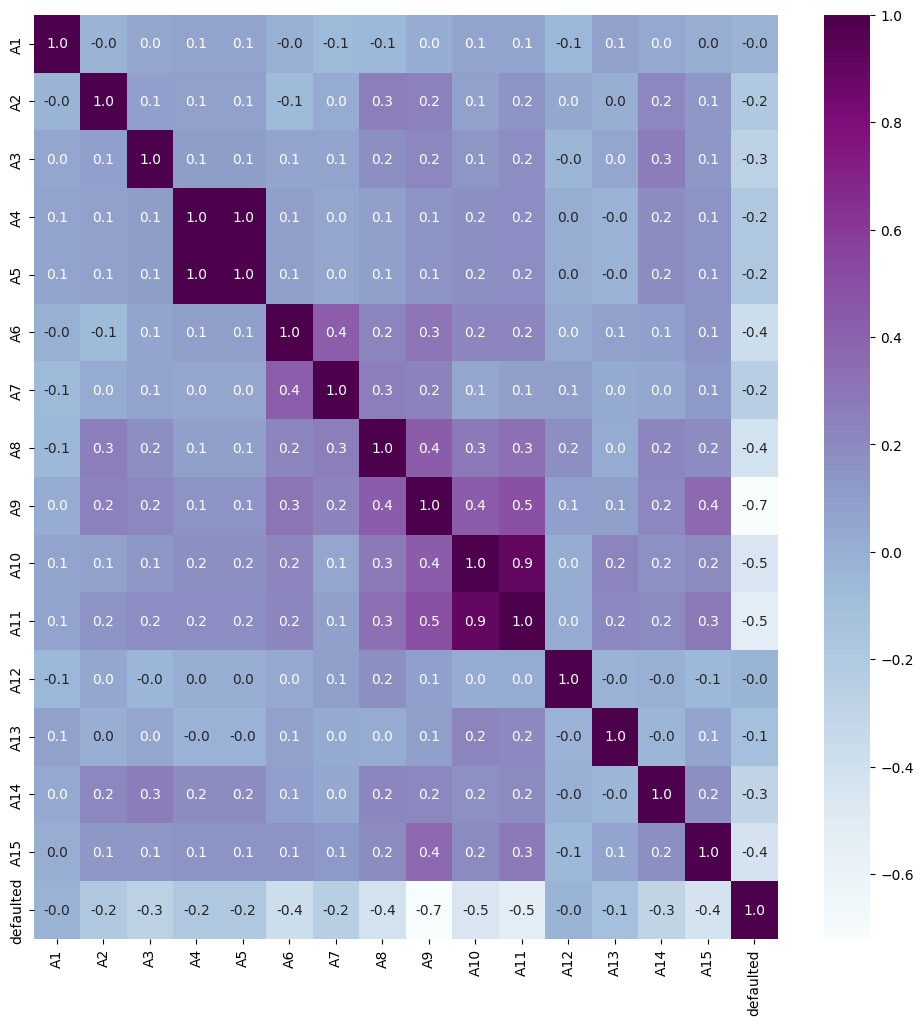

In [22]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=japanese_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [23]:
data.drop(['A4'], axis=1, inplace=True)

#### Save preprocessed dataset.

In [24]:
data

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,defaulted
0,0.019281,0.065997,-0.247919,-0.201993,-0.333665,0.096221,-0.533576,-1.526356,-1.109174,-0.331853,0.058701,-0.066059,0.488596,-0.022208,True
1,-0.087656,-0.905440,-0.452713,-0.201993,-0.859275,-0.783495,-0.733463,-1.526356,-1.109174,-2.610070,0.058701,-0.066059,-0.757116,-2.141055,True
2,-0.087656,0.065997,0.211613,-0.201993,-0.859275,-0.783495,-0.533576,-1.526356,0.887577,0.638761,0.058701,-0.066059,0.488596,-2.141055,True
3,0.019281,0.065997,0.342574,-0.201993,-0.333665,0.096221,-0.733463,-1.526356,-1.109174,-2.610070,-0.068995,-0.066059,-0.042032,2.391544,True
4,0.019281,0.065997,-0.452713,-0.201993,-0.333665,0.096221,-0.733463,-1.526356,0.887577,0.638761,0.058701,0.808432,0.355065,-0.022208,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.019281,0.065997,-0.680340,0.742835,-0.333665,-0.783495,-0.533576,2.366904,0.887577,0.638761,0.058701,-0.066059,0.488596,-0.022208,False
686,-0.087656,0.065997,0.578760,-0.201993,-0.030834,0.096221,-0.733463,2.366904,-1.109174,-0.331853,-0.068995,-0.066059,0.562704,-0.737238,False
687,-0.087656,0.065997,-0.680340,0.742835,1.661544,1.591192,-0.733463,2.366904,-1.109174,-0.331853,-0.068995,-0.066059,0.562704,2.391544,False
688,0.019281,0.971477,-0.247919,-0.201993,0.389722,0.096221,0.839589,2.366904,0.887577,0.638761,0.058701,-0.066059,0.488596,-2.141055,False


In [25]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         690 non-null    float64
 1   A2         690 non-null    float64
 2   A3         690 non-null    float64
 3   A5         690 non-null    float64
 4   A6         690 non-null    float64
 5   A7         690 non-null    float64
 6   A8         690 non-null    float64
 7   A9         690 non-null    float64
 8   A10        690 non-null    float64
 9   A11        690 non-null    float64
 10  A12        690 non-null    float64
 11  A13        690 non-null    float64
 12  A14        690 non-null    float64
 13  A15        690 non-null    float64
 14  defaulted  690 non-null    bool   
dtypes: bool(1), float64(14)
memory usage: 76.3 KB


**EMP-$p_1$:**

In [26]:
len(data[data['defaulted'] == True])/len(data)

0.4449275362318841

**EMP-$p_0$:**

In [27]:
len(data[data['defaulted'] == False])/len(data)

0.5550724637681159

In [28]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=japanese_prep_dataset_path)

Train split size: 552
Test split size: 138
